In [1]:
!pip install folium


In [2]:
!pip install geopandas

In [25]:
import folium
import math
from folium import Choropleth, Circle, Marker
from folium.plugins import MarkerCluster
import geopandas as gpd
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim # For geocoding & Reverse-geocoding
geolocator = Nominatim(user_agent="my_app") #using OpenStreet Map API

In [ ]:
Address = "Ikeja Lagos"
#Address = "30 Nwafor Orizu street, Surulere, Lagos" #You can also write it out like a street

Geo_Coordinate = geolocator.geocode(Address)
Geo_Coordinate

In [ ]:
world_map = folium.Map()

# display world map
world_map

In [26]:
#using Canada cordinates

Canada = folium.Map(location = [61.0666922, -107.9917071], tiles='openstreetmap', zoom_start = 4)
Canada

In [ ]:
Canada = folium.Map(location = [61.0666922, -107.9917071], tiles='cartodbdark_matter', zoom_start = 4)
Canada

In [ ]:
Canada = folium.Map(location = [61.0666922, -107.9917071], tiles='Stamen Toner', zoom_start = 4)
Canada

In [ ]:
Canada = folium.Map(location = [61.0666922, -107.9917071], tiles='Stamen Terrain', zoom_start = 4)
Canada

In [ ]:
Canada = folium.Map(location = [61.0666922, -107.9917071], tiles='cartodbpositron', zoom_start = 4)
Canada

In [ ]:
IkejaLagos = folium.Map(location = [6.6048591000000005, 3.3532040740949824], tiles='Stamen Toner', zoom_start = 4)
IkejaLagos

In [ ]:
# Create a map
Boston = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

# Display the map
Boston

In [4]:
#we read in hospital data

hospitals = gpd.read_file("nyu_2451_34494.shp")
hospitals.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,latitude,longitude,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,40.843490,-73.911010,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,40.831429,-73.903178,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,40.848060,-73.843656,POINT (1027505.000 248287.000)
3,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,40.855687,-73.845311,POINT (1027042.000 251065.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,40.816758,-73.924478,POINT (1005154.000 236853.000)


In [5]:
hospitals["capacity"] = hospitals["capacity"].fillna(0)

In [7]:
hospitals["capacity"] = hospitals["capacity"].astype(int)

In [30]:
hospital_map = folium.Map(location=[40.7, -74], zoom_start=11) 

for idx, row in hospitals.iterrows(): #for iterating over rows in pandas DataFrame
    folium.Marker(location = [row["latitude"], row["longitude"]], ).add_to(hospital_map)
hospital_map

In [8]:
collisions = gpd.read_file("NYPD_Motor_Vehicle_Collisions.shp")
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET,CROSS STRE,OFF STREET,NUMBER OF,NUMBER O_1,NUMBER O_2,NUMBER O_3,NUMBER O_4,NUMBER O_5,NUMBER O_6,NUMBER O_7,CONTRIBUTI,CONTRIBU_1,CONTRIBU_2,CONTRIBU_3,CONTRIBU_4,UNIQUE KEY,VEHICLE TY,VEHICLE _1,VEHICLE _2,VEHICLE _3,VEHICLE _4,geometry
0,07/30/2019,0:00,BRONX,10464,40.841100,-73.784960,"(40.8411, -73.78496)",None,None,121 PILOT STREET,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,None,None,4180045,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None,POINT (1043750.211 245785.815)
1,07/30/2019,0:10,QUEENS,11423,40.710827,-73.770660,"(40.710827, -73.77066)",JAMAICA AVENUE,188 STREET,None,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,None,None,None,4180007,Sedan,Sedan,None,None,None,POINT (1047831.185 198333.171)
2,07/30/2019,0:25,None,None,40.880318,-73.841286,"(40.880318, -73.841286)",BOSTON ROAD,None,None,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,None,None,None,4179575,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (1028139.293 260041.178)
3,07/30/2019,0:35,MANHATTAN,10036,40.756744,-73.984590,"(40.756744, -73.98459)",None,None,155 WEST 44 STREET,1.0,0.0,0,0,0,0,1,0,Oversized Vehicle,Unspecified,None,None,None,4179544,Box Truck,Station Wagon/Sport Utility Vehicle,None,None,None,POINT (988519.261 214979.320)
4,07/30/2019,10:00,BROOKLYN,11223,40.600090,-73.965910,"(40.60009, -73.96591)",AVENUE T,OCEAN PARKWAY,None,1.0,0.0,0,0,1,0,0,0,Traffic Control Disregarded,Unspecified,None,None,None,4180660,Station Wagon/Sport Utility Vehicle,Bike,None,None,None,POINT (993716.669 157907.212)


In [15]:
collision_map = folium.Map(location=[40.7, -74], zoom_start=11) 

# Your code here: Visualize the collision data
for idx, row in collisions.iterrows(): #for iterating over rows in pandas DataFrame
    folium.Marker([row["LATITUDE"], row["LONGITUDE"]]).add_to(collision_map)

collision_map

In [16]:
# Create the map
coliision_cluster = folium.Map(location=[40.7, -74], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in collisions.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
coliision_cluster.add_child(mc)

# Display the map
coliision_cluster

In [17]:
bubble_map = folium.Map(location=[40.7, -74], tiles='cartodbpositron', zoom_start=11) 
def color_producer(val):
    if val <= 500:
        return "forestgreen"
    else:
        return "darkred"

for i in range(0,len(hospitals)):
    Circle(
        location=[hospitals.iloc[i]['latitude'], hospitals.iloc[i]['longitude']],
        radius=100,
        color=color_producer(hospitals.iloc[i]["capacity"])).add_to(bubble_map)

# Display the map
bubble_map

In [11]:
districts_full = gpd.read_file('Police_Districts.shp')
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

,geometry
DISTRICT,
A15,"MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ..."
A7,"MULTIPOLYGON (((-70.99644 42.39557, -70.99644 ..."
A1,"POLYGON ((-71.05200 42.36884, -71.05169 42.368..."
C6,"POLYGON ((-71.04406 42.35403, -71.04412 42.353..."
D4,"POLYGON ((-71.07416 42.35724, -71.07359 42.357..."


In [12]:
plot_dict = crimes.DISTRICT.value_counts()
plot_dict.head()

B2     844
C11    713
D4     711
B3     664
A1     654
Name: DISTRICT, dtype: int64

In [21]:
# Create a base map
choropleth_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=districts.__geo_interface__, 
           data=plot_dict, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Major criminal incidents (Jan-Aug 2018)'
          ).add_to(choropleth_map)

# Display the map
choropleth_map

In [13]:
toxic = gpd.read_file("toxic_release_pennsylvania.shp")

In [28]:
toxic.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [31]:
toxic = gpd.read_file("toxic_release_pennsylvania.shp") #first dataset

In [32]:
Air_stations = gpd.read_file("PhillyHealth_Air_Monitoring_Stations.shp") #second dataset

In [33]:
# Select one toxic release incident in particular

toxic_release = toxic.iloc[360]

In [34]:
# Measure distance from toxic release to each air station

distances = Air_stations.geometry.distance(toxic_release.geometry)
distances

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [43]:
Air_stations.shape

(12, 24)

In [37]:
print("The mean distance is: ", distances.mean())
print('Closest monitoring station ({} feet)'.format(distances.min()))

The mean distance is:  33516.28487007786
Closest monitoring station (3780.623590556444 feet)


In [42]:
Air_stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]] #to get these attributes of the monitoring 
                                                                            #air station closest to the toxic release

ADDRESS      3100 Penrose Ferry Road
LATITUDE                     39.9128
LONGITUDE                   -75.1854
Name: 9, dtype: object

In [38]:
two_mile_buffer = Air_stations.geometry.buffer(2*5280)
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [52]:
import sys
sys.setrecursionlimit(10**6)

In [17]:
buffer = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
for idx, row in Air_stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(buffer)
    
# Plot each polygon on the map
folium.GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m)

# Show the map
buffer

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


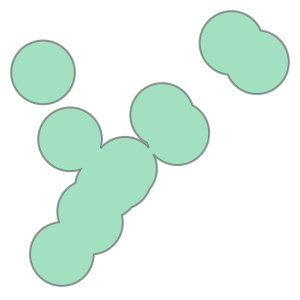

In [39]:
# Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union
print('Type:', type(my_union))

# Show the MultiPolygon object
my_union

In [24]:
my_union.contains(toxic.iloc[360].geometry)

True

In [22]:
my_union.contains(toxic.iloc[100].geometry)

True

In [46]:
my_union.contains(toxic.iloc[1008].geometry)

False

In [23]:
toxic.shape

(4663, 10)